In [1]:
import os
import numpy as np
import pandas as pd
from keras.utils import load_img
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.utils import to_categorical
from keras.optimizers import Adam
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img
from PIL import Image
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

# drive.flush_and_unmount()

In [2]:
from google.colab import drive
drive.mount('/content/drive')

path = '/content/drive/My Drive/backup_20_2_2023/HK2_2023/NienLuan/sources/'



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
data_path = path + "origin_data"
# 0:20 1:30 2:50 3:60 4:70
labels = ["Giới hạn tốc độ 40km/h", "Giới hạn tốc độ 50km/h", "Giới hạn tốc độ 60km/h",
          "Hết hạn giới hạn tốc độ tối đa 40km/h", "Hết hạn giới hạn tốc độ tối đa 50km/h",
          "Hết hạn giới hạn tốc độ tối đa", "Vào khu vực khu dân cư", "Ra khỏi khu vực khu dân cư", "Cấm", "Stop",
          "Chợ"
]

In [4]:
def load_and_resize_image(classes, data_path, target_size, grayscale):
    data = []
    labels = []
    for i in range(classes):
        path = os.path.join(data_path,str(i))
        images = os.listdir(path)
        # count = 0
        for a in images:
            try:
                # if count >=50:
                #     break
                img = load_img( 
                            os.path.join(data_path,str(i),a),
                            grayscale=grayscale,
                            color_mode="rgb",
                            target_size=target_size,
                )
                img = np.array(img)
                data.append(img)
                labels.append(i)
                # count +=1
            except:
                print('khong the load file')
    print(pd.value_counts(labels))
    return np.array(data), np.array(labels)

In [5]:
classes = 11
X, y = load_and_resize_image(classes=classes, data_path=data_path, target_size=(150,150),grayscale=False)
print(X.shape, y.shape)


X_train , X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=100)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

#one-hot encoding the labels
y_train = to_categorical(y_train, classes)
y_test = to_categorical(y_test, classes)
print(y_train.shape, y_test.shape)

1     2418
2     1668
8     1168
9      827
0      549
5      301
4      204
3      166
7      158
6      148
10     111
dtype: int64
(7718, 150, 150, 3) (7718,)
(6174, 150, 150, 3) (1544, 150, 150, 3) (6174,) (1544,)
(6174, 11) (1544, 11)


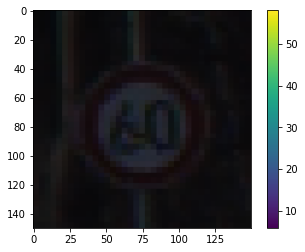

In [6]:
plt.figure()
plt.imshow(X_train[0])
# plt.imshow(X_test[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [7]:
def built_model(input_shape, classes):
    model = Sequential()
    model.add(Conv2D(32, kernel_size=(3, 3), padding='same', activation='relu', input_shape=input_shape))
    model.add(Conv2D(32, kernel_size=(3, 3), padding='same',activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(64, kernel_size=(3, 3),padding='same', activation='relu'))
    model.add(Conv2D(64, kernel_size=(3, 3),padding='same', activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(128, kernel_size=(3, 3),padding='same', activation='relu'))
    model.add(Conv2D(128, kernel_size=(3, 3),padding='same', activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(256, kernel_size=(3, 3),padding='same', activation='relu'))
    model.add(Conv2D(256, kernel_size=(3, 3),padding='same', activation='relu'))
    model.add(Conv2D(256, kernel_size=(3, 3),padding='same', activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(512, kernel_size=(3, 3),padding='same', activation='relu'))
    model.add(Conv2D(512, kernel_size=(3, 3),padding='same', activation='relu'))
    model.add(Conv2D(512, kernel_size=(3, 3),padding='same', activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(512, kernel_size=(3, 3),padding='same', activation='relu'))
    model.add(Conv2D(512, kernel_size=(3, 3),padding='same', activation='relu'))
    model.add(Conv2D(512, kernel_size=(3, 3),padding='same', activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Flatten())
    model.add(Dense(4096, activation = 'relu'))
    model.add(Dense(4096, activation = 'relu'))
    model.add(Dense(classes, activation='softmax'))
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    print(model.summary())
    return model
 

In [8]:
model = built_model(X_train.shape[1:], classes )

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 150, 150, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 75, 75, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 75, 75, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 75, 75, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 37, 37, 64)       0         
 2D)                                                    

In [9]:
model.fit(x = X_train, y = y_train, batch_size=32, epochs=5)

score =  model.evaluate( x = X_test, y = y_test, batch_size=32)

Epoch 1/5
193/193 [==============================] - 2363s 12s/step - loss: 5.6910 - accuracy: 0.3076
Epoch 2/5
193/193 [==============================] - 2211s 11s/step - loss: 0.9999 - accuracy: 0.5952
Epoch 3/5
193/193 [==============================] - 2124s 11s/step - loss: 0.7081 - accuracy: 0.7368
Epoch 4/5
193/193 [==============================] - 2144s 11s/step - loss: 0.3585 - accuracy: 0.8827
Epoch 5/5
49/49 [==============================] - 132s 3s/step - loss: 0.1845 - accuracy: 0.9508


In [10]:
pred = model.predict(X_test, batch_size = 32)
pred = np.argmax(pred, axis = 1)


49/49 [==============================] - 150s 3s/step


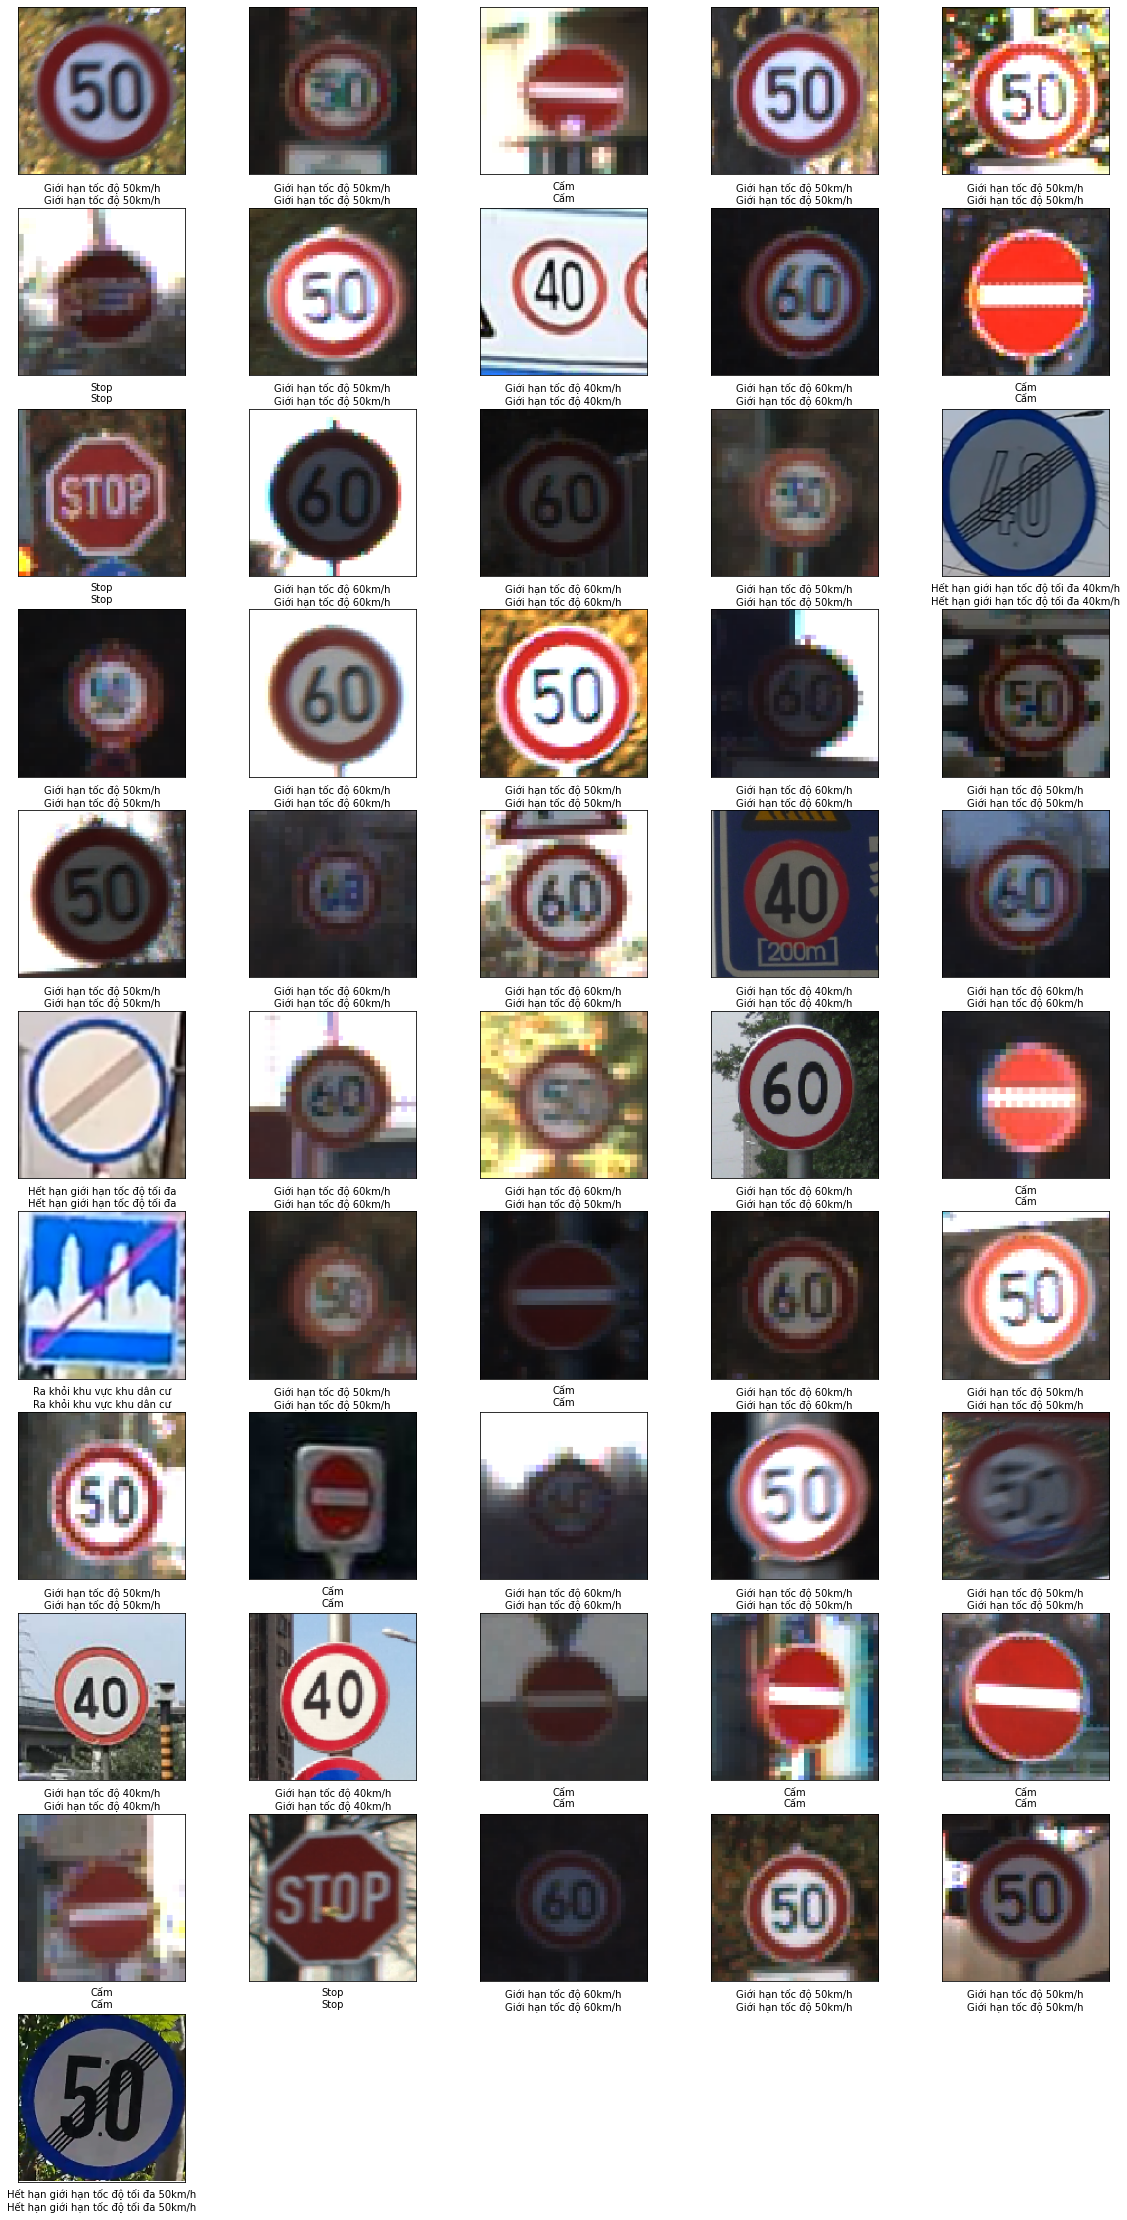

In [11]:
argmax_y_test = np.argmax(y_test, axis = 1)

plt.figure(figsize=(20,40))
test_size = int(len(argmax_y_test)/30)
for i in range(test_size):
    plt.subplot(int(test_size/5+1),5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_test[i], cmap=plt.cm.binary)
    plt.xlabel(labels[pred[i]]+"\n"+labels[argmax_y_test[i]])
plt.show()

In [12]:
matrix = confusion_matrix(argmax_y_test, pred)
print(matrix)

[[118   0   0   0   0   0   0   0   0   0   0]
 [  0 459  12   0   0   1   0   0   0   0   0]
 [ 16   8 308   0   0   0   0   0   0   0   0]
 [  0   0   0  35   1   1   0   0   0   0   0]
 [  0   0   0   2  34   0   0   0   0   0   0]
 [  0  12   0   5   3  37   0   1   0   0   0]
 [  0   0   0   0   0   0  33   0   0   0   0]
 [  0   0   0   0   0   4   5  26   0   0   0]
 [  0   0   0   0   0   0   0   0 240   2   0]
 [  0   0   0   0   0   0   0   1   1 158   0]
 [  0   0   0   0   0   0   0   0   0   1  20]]


In [13]:
model.save(path + 'models/model_v10.h5')